In [11]:
import sys
import os
from pathlib import Path
from dotenv import load_dotenv
import pandas as pd
import importlib

sys.path.append(os.path.abspath(".."))

import src.models.lgbm.lgbm_cv_trainer as cv
import src.models.lgbm.lgbm_optuna_optimizer as op
import src.utils.optuna_visualizer as opv
import src.models.lgbm.lgbm_ensemble as en

In [8]:
# データの読み込み
env_path = Path.cwd().parent / ".env"
load_dotenv(dotenv_path=env_path)
url = os.environ.get("OPTUNA_STORAGE_URL")

tr_df1 = pd.read_csv("../artifacts/features/tr_df1.csv")
test_df1 = pd.read_csv("../artifacts/features/test_df1.csv")

cat_cols = ["Sex"]

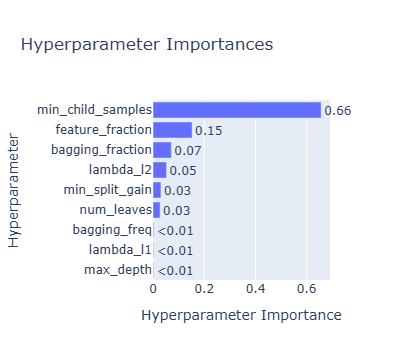

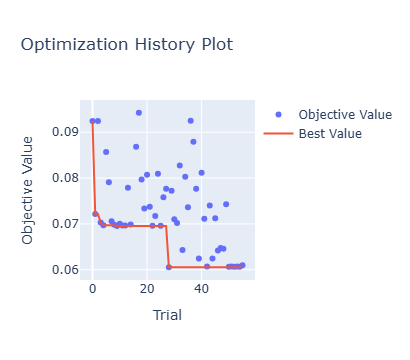

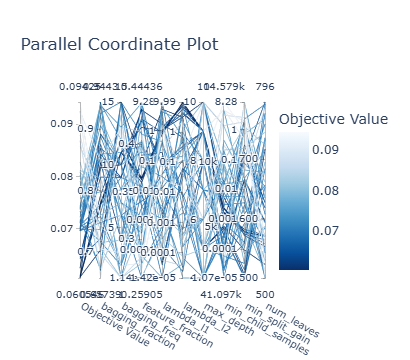

=== Trial 28 ===
CV Score       : 0.06055
Best Iteration : 5329
Params:
params = {
    "max_depth": 5,
    "num_leaves": 523,
    "min_child_samples": 5056,
    "min_split_gain": 9.275294835907687e-05,
    "feature_fraction": 0.43593953046851464,
    "bagging_fraction": 0.8924361138693251,
    "bagging_freq": 10,
    "lambda_l1": 1.6934155410667961,
    "lambda_l2": 0.6637926838138378
}
=== Trial 50 ===
CV Score       : 0.06066
Best Iteration : 5862
Params:
params = {
    "max_depth": 9,
    "num_leaves": 564,
    "min_child_samples": 6104,
    "min_split_gain": 0.00031449627490406944,
    "feature_fraction": 0.417706784536384,
    "bagging_fraction": 0.7758145905612744,
    "bagging_freq": 11,
    "lambda_l1": 0.9297264003586927,
    "lambda_l2": 8.144189266790793
}
=== Trial 52 ===
CV Score       : 0.06067
Best Iteration : 5861
Params:
params = {
    "max_depth": 9,
    "num_leaves": 557,
    "min_child_samples": 6044,
    "min_split_gain": 0.00039031384868829346,
    "feature_fracti

,study_name,n_trials,best_score,direction,datetime_start
0,lgb_v1,20,0.097196,MAXIMIZE,2025-07-17 03:49:00
1,lgb_v1.1,56,0.060546,MINIMIZE,2025-07-17 03:53:51


In [14]:
# lgb_v1の探索結果の確認
importlib.reload(opv)
study_name = "lgb_v1.1"

study = opv.OptunaVisualizer(study_name, url)
study.visualize_optimization()
study.print_trials_table()
study.summarize_studies()


Fold 1
Training until validation scores don't improve for 100 rounds
[100]	train's multi_logloss: 1.89379	train's map@3: 0.372167	eval's multi_logloss: 1.91719	eval's map@3: 0.335069
[200]	train's multi_logloss: 1.8653	train's map@3: 0.408294	eval's multi_logloss: 1.90723	eval's map@3: 0.348045
[300]	train's multi_logloss: 1.84219	train's map@3: 0.431395	eval's multi_logloss: 1.901	eval's map@3: 0.354418
[400]	train's multi_logloss: 1.82274	train's map@3: 0.446671	eval's multi_logloss: 1.89702	eval's map@3: 0.358107
[500]	train's multi_logloss: 1.806	train's map@3: 0.458124	eval's multi_logloss: 1.89491	eval's map@3: 0.35994
[600]	train's multi_logloss: 1.79081	train's map@3: 0.467751	eval's multi_logloss: 1.89366	eval's map@3: 0.361328
[700]	train's multi_logloss: 1.77709	train's map@3: 0.475337	eval's multi_logloss: 1.89321	eval's map@3: 0.362319
[800]	train's multi_logloss: 1.76485	train's map@3: 0.481748	eval's multi_logloss: 1.89371	eval's map@3: 0.363025
Early stopping, best ite

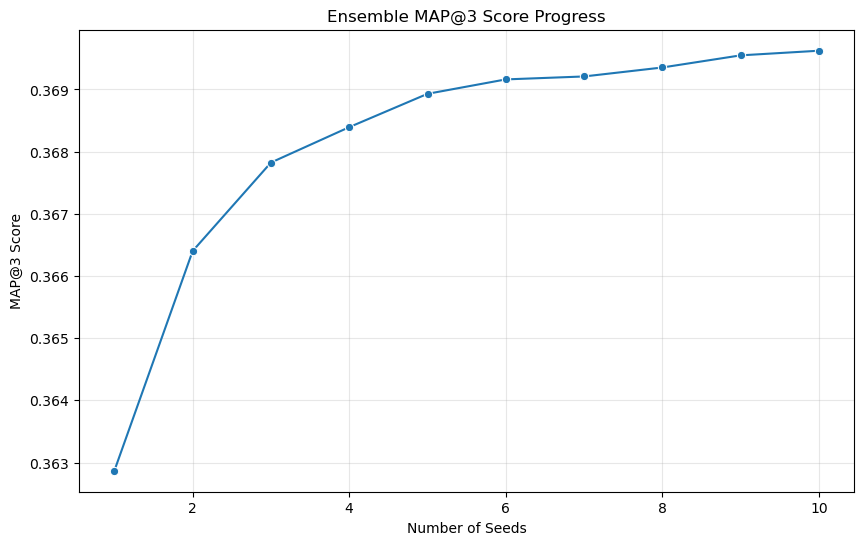

In [9]:
# ID16のensemble
params = {
    "max_depth": 8,
    "num_leaves": 621,
    "min_child_samples": 9729,
    "min_split_gain": 0.0008793022734111571,
    "feature_fraction": 0.3514478163144178,
    "bagging_fraction": 0.8842473071543802,
    "bagging_freq": 2,
    "lambda_l1": 0.00026003894788305436,
    "lambda_l2": 2.112199050376843
}

avg_oof, avg_test = en.ensemble_with_seeds(
    tr_df1, test_df1, params, cat_cols, seeds=10, ID=16)